# 1 Import and Init

In [70]:
import numpy as np

In [303]:
N,k=600,10
learning_rate=0.01
sigma_square=2  # " dans la papier sigma_square=100"
mu=np.zeros(k)
variance_=sigma_square*np.identity(k)
teta_none=np.array([i+1 for i in range(k) ])


In [72]:
python_interpretator="/home/onyxia/work/Sampling-Methods-MCMC-Project/Manifold_MALA/mMALA_Vistual_Env/bin/python"

2. Set mMALA Requirement Function

In [299]:
def log_likelihood(X,Y,teta):
    N,k=X.shape
    beta_T=teta.transpose()
    X_T=X.transpose()
    ee=0.0000001
    log_likeli=np.round((teta@X_T)@Y,15)

    for n in range(N):
        log_likeli=log_likeli-np.log(1+ee+np.round(np.exp(teta@(X[n,:].transpose())),15))

    return np.round(log_likeli,10)


In [301]:
ll=log_likelihood(X,Y,teta)
ll

-575.808107125

In [302]:
# application
X=np.random.randn(N,k)
Y=np.random.randn(N)#.reshape(3,1)

print(X.shape,Y.shape)


(600, 10) (600,)


In [322]:
def get_densite_value(betha_,mu=mu,variance_=variance_):
    k=len(beta_)
    det_=np.linalg.det(variance_)
    inv_variance_=np.linalg.inv(variance_)
    gap=betha_-mu
    gap_T=gap.transpose()
    pi_=np.round(np.pi,6)
    const1=np.round(np.sqrt(((2*pi_)**(k))),2)
    normalisation_constante=np.round((1/(const1*det_)),10)
    value=(-1/2)*(gap@inv_variance_@gap_T)
    densite_value=np.round(normalisation_constante*np.exp(value),100)

    return densite_value#np.round(densite_value,15)

In [323]:
get_densite_value(beta)

1.5770711065597703e-49

In [331]:
def link_fun_value(X_i,beta):
    betha_T=beta.transpose()
    X_i_T=X_i.transpose()
    ee=0.0000001
    x=np.round(betha_T@X_i_T,15)+ee
    value1=np.round(ee+np.exp(x),100)
    value=1/(1+value1)
    return np.round(value,100)

In [332]:
X_1=X[2]
link_fun_value(X[1],beta_),link_fun_value(X[2],beta)

(0.9947349023955282, 1.725650795321001e-10)

In [326]:
def get_Lambda_Matrix(X,betha_):
    N=X.shape[0]
    left_real_values=[link_fun_value(X[i,:],betha_) for i in range(N)]
    real_values=[np.round(left_real_values[i]*(1-left_real_values[i]),100) for i in range(N)]
    Lambda_matrix=np.diag(real_values)

    return Lambda_matrix


In [333]:
Lambda_Matrix=get_Lambda_Matrix(X,beta)
Lambda_Matrix

array([[2.21646094e-10, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000094e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.72565080e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.98675278e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.64789347e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00033725e-07]])

In [334]:
def Tensor_metric_G(X,beta_,sigma_square=1):
    k=len(beta_)
    Lambda_Matrix=get_Lambda_Matrix(X,beta_)
    X_t=X.transpose()
    G_of_beta=X_t@(Lambda_Matrix@X)-variance_

    return G_of_beta

In [336]:
G_of_beta=Tensor_metric_G(X,beta)
G_of_beta

array([[ 1.21866505e+01,  9.19252794e-01,  1.82028286e+00,
        -1.93629368e-01, -1.08147434e+00, -3.66468588e+00,
         7.96250958e-01,  7.93635087e-01, -1.24871855e+00,
         5.54144620e-01],
       [ 9.19252794e-01,  1.13181229e+01,  9.13286594e-01,
        -4.63977164e-02, -1.99512440e+00, -7.00025165e-01,
        -2.70160757e-01,  4.28311311e-01,  5.96914623e-01,
        -2.07702022e+00],
       [ 1.82028286e+00,  9.13286594e-01,  1.21943247e+01,
         7.67587251e-01, -2.33683261e+00,  4.70635875e-02,
         9.60298343e-01, -9.48425626e-01, -1.53283231e+00,
        -2.15533692e+00],
       [-1.93629368e-01, -4.63977164e-02,  7.67587251e-01,
         1.07172928e+01, -4.29303314e-01, -2.36056050e+00,
        -1.19452272e+00, -3.62322908e+00,  1.54658888e-01,
        -3.42740117e-03],
       [-1.08147434e+00, -1.99512440e+00, -2.33683261e+00,
        -4.29303314e-01,  8.76210091e+00, -7.60267844e-01,
        -1.25530593e+00,  9.75594292e-01, -6.71075980e-01,
        -2.

In [337]:
def compute_V_i(X,i,beta_):
    N=X.shape[0]
    diag_elts=[(1-2*link_fun_value(X[n],beta_))*X[n,i] for n in range(N)]
    V_i_Matrix=np.diag(diag_elts)
    return V_i_Matrix

In [339]:
i=9
compute_V_i(X,i,beta_)

array([[-0.3944453 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.96341538,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.47269919, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.46341443,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.83857398,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.21925608]])

In [340]:
def get_G_partial_derivative(X,i,beta_):
    X_t=X.transpose()
    Lambda_Matrix=get_Lambda_Matrix(X,beta_)
    V_i_Matrix=compute_V_i(X,i,beta_)
    G_partial_derivative_Matrix=X_t@Lambda_Matrix@V_i_Matrix@X

    return G_partial_derivative_Matrix


In [341]:
G_partial_derivative_Matrix=get_G_partial_derivative(X,i,beta)
G_partial_derivative_Matrix

array([[-2.93629762e-01,  5.80744969e-01, -5.48920754e-01,
        -6.82170556e-01,  7.45319600e-01,  9.81548093e-01,
         4.00423184e-01,  2.52594657e-01,  3.51608870e-01,
        -1.38556515e+00],
       [ 5.80744969e-01, -5.31120634e-01, -5.03078236e-01,
         6.94957904e-02, -7.16624261e-01,  8.34944108e-01,
         1.06660231e-01, -4.74158472e-01, -1.47404336e+00,
         1.58924890e+00],
       [-5.48920754e-01, -5.03078236e-01, -3.26329626e-01,
        -3.84902360e-01, -3.35258955e-01, -6.38788855e-02,
        -7.81656998e-02,  2.24842480e-02, -3.19367998e-04,
         4.43034025e-01],
       [-6.82170556e-01,  6.94957904e-02, -3.84902360e-01,
        -1.50612350e-01,  1.48090615e+00,  4.42486070e-01,
         4.55799469e-01,  5.58521381e-01, -2.97782550e-01,
        -1.33501426e+00],
       [ 7.45319600e-01, -7.16624261e-01, -3.35258955e-01,
         1.48090615e+00, -2.04234203e+00, -9.28344604e-02,
        -8.10475792e-01, -1.68203386e+00, -3.28747777e-01,
         2.

In [342]:
def Log_likelihood_gradient(X,Y,beta_):
    N=X.shape[0]
    X_Transpose=X.transpose()
    X_n=np.zeros(k)
    gradien_value=X_Transpose@Y
    for n in range(N):
        X_n=X[n,:]
        gradien_value=gradien_value-link_fun_value(X_n,beta_)*(X_n.transpose())

    return gradien_value


In [344]:
gradien_value=Log_likelihood_gradient(X,Y,beta)
gradien_value

array([-17.42686456,   5.97426807,  92.70429087,  65.41824069,
        99.33823502,  88.06832841,  78.3608105 ,  94.98189502,
        97.55354979, 129.53441015])

In [346]:
def proposal_Distribution_mean(X,Y,beta_,learning_rate=learning_rate):
    N,k=X.shape
    e=learning_rate
    G=Tensor_metric_G(X,beta_)
    inv_G=np.linalg.inv(G)

    term2=(1/2)*(e**2)*inv_G@Log_likelihood_gradient(X,Y,beta_)
    term3=np.zeros(k)
    term4=np.zeros(k)
    for j in range(k):
        term3=term3-(e**2)*(inv_G@get_G_partial_derivative(X,j,beta_)@inv_G)[:,j]
    for j in range(k):
        terme4=term4+(e**2)*inv_G[:,j]*np.trace(inv_G@get_G_partial_derivative(X,j,beta_))

    proposal_mean=beta_+term2+term3+term4
    return proposal_mean
    

In [349]:
proposal_mean=proposal_Distribution_mean(X,Y,beta,learning_rate)
proposal_mean,beta

(array([0.99948897, 1.99932757, 2.99928038, 3.99863035, 4.99857791,
        5.99792573, 6.99756028, 7.99711371, 8.99677488, 9.99656915]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [350]:
def get_matrix_sqrt(X):
    U, s, V = np.linalg.svd(X)

# Racine carrée des valeurs singulières
    s_sqrt = np.sqrt(s)

# Reconstruction de la matrice racine carrée
    X_sqrt = U.dot(np.diag(s_sqrt)).dot(V)

    return X_sqrt

In [356]:
def proposal_Distribution_variance_matrix_fun(X,beta_,learning_rate=learning_rate): # c'est plutot l'cartype
    e=learning_rate
    G=Tensor_metric_G(X,beta_)
    inv_G=np.linalg.inv(G)
    inv_G_sqrt=get_matrix_sqrt(inv_G)
    
    return e*inv_G_sqrt

In [357]:
prop_var=proposal_Distribution_variance_matrix_fun(X,beta)
prop_var.shape

(10, 10)

In [359]:
def beta_drawner(X,Y,beta_,learning_rate=learning_rate):
    N,k=X.shape
    mean_=proposal_Distribution_mean(X,Y,beta_,learning_rate)
    variance=proposal_Distribution_variance_matrix_fun(X,beta_,learning_rate)
    Z=np.random.randn(k)
    proposed_teta=mean_+variance@Z
    
    return proposed_teta

In [361]:
thetaStart=beta_drawner(X,Y,beta,learning_rate)
thetaStart

array([0.99937732, 1.99534564, 2.99483837, 3.99557929, 4.99559576,
       5.99617386, 7.00139789, 7.99687548, 8.9943057 , 9.9887062 ])

In [373]:

def Acceptance_Rati(thetaStart, theta_,X,Y,learning_rate=learning_rate):
    LL_theta=log_likelihood(X,Y,theta_)
    LL_theta_start=log_likelihood(X,Y,thetaStart)

    teta_mu_proposal=proposal_Distribution_mean(X,Y,thetaStart,learning_rate)
    teta_variance_propsal=proposal_Distribution_variance_matrix_fun(X,thetaStart,learning_rate)
    tetaStart_mu_proposal=proposal_Distribution_mean(X,Y,beta_,learning_rate)
    tetaStar_variance_propsal=proposal_Distribution_variance_matrix_fun(X,beta_,learning_rate)

    
    p_teta=np.round(get_densite_value(theta_,mu=mu,variance_=variance_),100)
    q_teta=np.round(get_densite_value(theta_,mu=teta_mu_proposal,variance_=teta_variance_propsal),100)

    p_teta_start=np.round(get_densite_value(theta_,mu=mu,variance_=variance_),100)
    q_teta_start=np.round(get_densite_value(theta_,mu=tetaStart_mu_proposal,variance_=tetaStar_variance_propsal),100)
    ee=0.0000001 # ajouter valeur dans les entrées des logs afin de d'éviter de se retorouve avec acceptane=inf 

    #acceptance_rate=ee+np.round(np.log(p_teta_start+ee),100)+np.round(np.log(q_teta_start+ee),100)-np.round(np.log(p_teta+ee),100)-np.round(np.log(q_teta+ee),100)
    #acceptance_rate=LL_theta_start- LL_theta +np.log(ee+p_teta_start+q_teta-p_teta-q_teta_start)
    acceptance_rate=ee+p_teta_start+q_teta-p_teta-q_teta_start

    return acceptance_rate


In [374]:

acceptance_rate_=Acceptance_Rati(thetaStart, beta,X,Y,learning_rate)
acceptance_rate_

-5.878728216336667e+20

In [376]:
proposed_beta=beta_drawner(X,Y,beta,learning_rate=learning_rate)
proposed_beta


array([1.00813235, 1.99737811, 2.99724592, 3.99674965, 4.99714172,
       5.99977891, 6.99107504, 7.98920335, 8.99160421, 9.99466865])

In [140]:
""" 
puique les deux lois proposal and prior sont des loi de normales alors , on a beasoin d'implémenter une fonction
calcul le log prior pour la loi propsal , on juste utiliser celle basée sur la loi à priori en définisant la moyenne et la 
variance des dlois comme des arguments .
"""

" \npuique les deux lois proposal and prior sont des loi de normales alors , on a beasoin d'implémenter une fonction\ncalcul le log prior pour la loi propsal , on juste utiliser celle basée sur la loi à priori en définisant la moyenne et la \nvariance des dlois comme des arguments .\n"

In [377]:
def one_step_mMALA(X,Y,beta_,learning):
    # sample new teta base on the previous teta
    N,k=X.shape
    thetaStart=beta_drawner(X,Y,beta_,learning_rate=1)
    acceptance_rate_=Acceptance_Rati(thetaStart, beta_,X,Y,learning_rate)
    rand=np.random.uniform(0, 1)
    if (acceptance_rate_>1) or (acceptance_rate_>rand):
        return thetaStart
    else:
        return beta_

MALA Algorithsm

In [378]:
def MALA_beta_drawner(X,Y,curren_beta,learning_rate=learning_rate):
    e=learning_rate
    N,k=X.shape
    pi=np.round(np.pi,4)
    z=np.random.randn(k)
    gll=Log_likelihood_gradient(X,Y,beta_)
    proposal_beta= curren_beta + e*gll + np.sqrt(2*pi*e)*z
    
    return proposal_beta

In [387]:
beta_MALA=MALA_beta_drawner(X,Y,beta)
beta_MALA

array([ 1.32763493,  2.2093561 ,  4.85000685,  4.59333175,  6.31535232,
        6.52946956,  7.15205156,  8.3875291 ,  9.7231249 , 11.01705484])

In [384]:
def MALA_proposal_Distribution_mean(X,Y,curent_teta,learning_rate=learning_rate):
    e=learning_rate
    gll=Log_likelihood_gradient(X,Y,curent_teta)

    proposal_mean=curent_teta+e*beta_*gll
    return proposal_mean

In [385]:
def MALA_proposal_Distribution_Variance(learning_rate=learning_rate,dim_beta=k):
    e=learning_rate
    k=dim_beta
    pi=np.round(np.pi,5)
    return 4*pi*e*np.identity(k)

In [382]:
MALA_proposal_Distribution_Variance()

array([[0.1256636, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.1256636, 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.1256636, 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.1256636, 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.1256636, 0.       ,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.1256636,
        0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.1256636, 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.1256636, 0.     

In [383]:
MALA_proposal_Distribution_mean(X,Y,beta,learning_rate=learning_rate)

array([ 0.82573135,  2.05974268,  3.92704291,  4.65418241,  5.99338235,
        6.88068328,  7.7836081 ,  8.94981895,  9.9755355 , 11.2953441 ])

In [386]:
def MALA_Acceptance_Rati(thetaStart, theta_,X,Y,learning_rate=learning_rate):
    LL_theta=log_likelihood(X,Y,theta_)
    LL_theta_start=log_likelihood(X,Y,thetaStart)

    teta_mu_proposal=MALA_proposal_Distribution_mean(X,Y,thetaStart,learning_rate)
    teta_variance_propsal=MALA_proposal_Distribution_Variance(learning_rate,k)
    tetaStart_mu_proposal=MALA_proposal_Distribution_mean(X,Y,beta_,learning_rate)
    tetaStar_variance_propsal=MALA_proposal_Distribution_Variance(learning_rate,k)

    
    p_teta=get_densite_value(theta_,mu=mu,variance_=variance_)
    q_teta=get_densite_value(theta_,mu=teta_mu_proposal,variance_=teta_variance_propsal)

    p_teta_start=get_densite_value(theta_,mu=mu,variance_=variance_)
    q_teta_start=get_densite_value(theta_,mu=tetaStart_mu_proposal,variance_=tetaStar_variance_propsal)
    ee=0.000001
    #acceptance_rate=ee+np.round(+np.log(p_teta_start+ee)+np.log(q_teta_start+ee)-np.log(p_teta+ee)-np.log(q_teta+ee),25)
    acceptance_rate=ee+p_teta_start+q_teta-p_teta-q_teta_start


    return acceptance_rate



In [388]:

MALA_Acceptance_Rati(beta_MALA, beta,X,Y,learning_rate=learning_rate)

1e-06

In [393]:
def one_step_MALA(X,Y,beta_,learning_rate=learning_rate):
    # sample new teta base on the previous teta
    N,k=X.shape
    thetaStart=MALA_beta_drawner(X,Y,beta_,learning_rate=1)
    acceptance_rate_=MALA_Acceptance_Rati(thetaStart, beta_,X,Y,learning_rate)
    rand=np.random.uniform(0, 1)
    ee=0.0001
    if (acceptance_rate_>1) or (acceptance_rate_>rand):
        return thetaStart
    else:
        return beta_

In [394]:
one_step_MALA(X,Y,beta,learning_rate)

/tmp/ipykernel_339306/1592639042.py:9: RuntimeWarning: overflow encountered in exp
  log_likeli=log_likeli-np.log(1+ee+np.round(np.exp(teta@(X[n,:].transpose())),15))
/home/onyxia/work/Sampling-Methods-MCMC-Project/mMALA/mMALA_virtual_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/tmp/ipykernel_339306/486246614.py:6: RuntimeWarning: overflow encountered in exp
  value1=np.round(ee+np.exp(x),100)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# 0 DGP 

In [395]:
import random 
seed=1996
np.random.seed(seed)
random.seed(seed)

In [158]:
import  numpy as np 
import random as rd 

In [159]:
def get_covariate_data(N=N,k=k):
    data=np.random.randn(N,k)

    return data

In [396]:
def indicator_fun(x):
    if x >= 0:
        return 1
    else:
         return 0

In [397]:
X=get_covariate_data(N,k)

In [398]:
X.shape

(600, 10)

In [399]:

N,k=X.shape
teta=np.array([i/k for i in range(k)])
def get_output(data,teta):
    noise_value=np.random.randn(N).reshape(N,1)
    teta=teta.reshape(k,1)
    data=data.reshape(N,k)
    value_=data@teta   #+noise_value
    Y=np.array([indicator_fun(value_[i]) for i in range(N)])
    return Y 

In [400]:
Y=get_output(X,teta)
Y.shape

(600,)

In [401]:
test_size=100
X_test,Y_test=X[:test_size],Y[:test_size]
X,Y=X[test_size:],Y[test_size:]
print( "Train : ",X.shape ," et ",Y.shape)
print( "Test : ",X_test.shape ," et ",Y_test.shape)

Train :  (500, 10)  et  (500,)
Test :  (100, 10)  et  (100,)


# I Manifold MALA Alogrithsm

In [413]:
def get_mMALA_MarkovCHaine(X,Y,B=10):
    N,k=X.shape
    theta_current=np.zeros(k)
    mMALA_chaine=[]
    for b in range(B):
        theta_current=one_step_mMALA(X,Y,theta_current,learning_rate)
        mMALA_chaine.append(theta_current)    
    return   mMALA_chaine

In [414]:
mMALA_chaine=get_mMALA_MarkovCHaine(X,Y,B=10)


In [415]:
mMALA_chaine[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [416]:
def predictor(X,teta_hat):
    N=X.shape[0]
    Pred_Probas=np.zeros(N)
    Y_pred=np.zeros(N)
    for i in range(N):
        Pred_Probas[i]=link_fun_value(X[i],teta_hat)
        Y_pred[i]=indicator_fun(Pred_Probas[i]-0.5)

    return Y_pred

In [417]:
# Exemple de données de prédiction et de vraies étiquettes
beta_hat=mMALA_chaine[-1]
y_pred = predictor(X_test,beta_hat)
y_pred.shape

(100,)

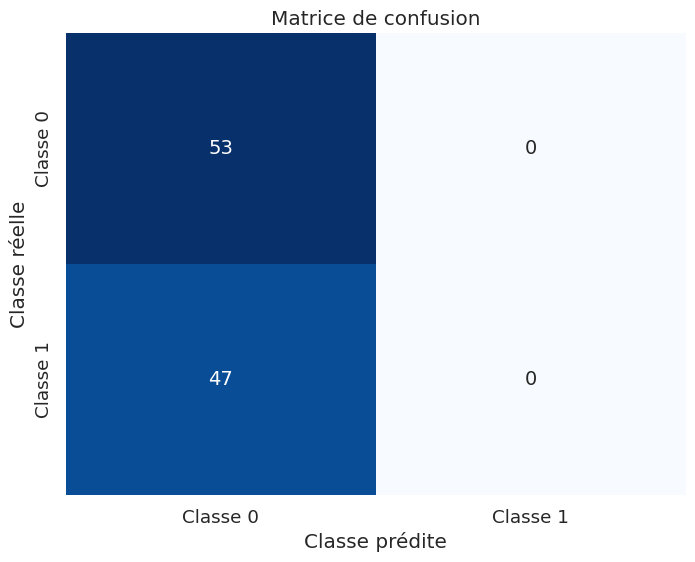

In [418]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred)

# Étiquettes des classes
class_names = ['Classe 0', 'Classe 1']

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()


In [408]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()


In [420]:
def plot_chaine_distr(beta_mc,true_params=0,i=0,algo="mMALA"):
    N=len(list(beta_mc))
    data=[beta_mc[i][0] for i in range(N)]
    sns.distplot(data)
    plt.axvline(x=beta[i], color='red', linestyle='--')
    plt.xlabel(" Beta estimated ")
    plt.ylabel("Frequency")
    plt.title(" Distribution of beta ")
    plt.grid()

/tmp/ipykernel_339306/2623174460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/home/onyxia/work/Sampling-Methods-MCMC-Project/mMALA/mMALA_virtual_env/lib/python3.11/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


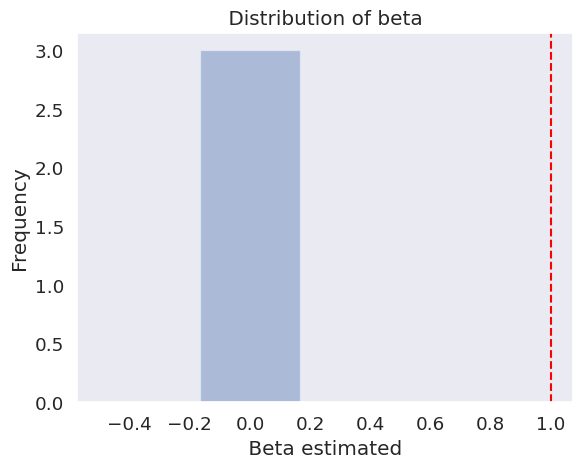

In [421]:
plot_chaine_distr(mMALA_chaine)

 MALA Experience

In [422]:
def get_MALA_MarkovCHaine(X,Y,B=10):
    N,k=X.shape
    theta_current=np.zeros(k)+1
    MALA_chaine=[]
    for b in range(B):
        theta_current=one_step_MALA(X,Y,theta_current,learning_rate)
        MALA_chaine.append(theta_current)    
    return   MALA_chaine

In [423]:
MALA_chaine=get_MALA_MarkovCHaine(X,Y,B=1000)


/home/onyxia/work/Sampling-Methods-MCMC-Project/mMALA/mMALA_virtual_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/tmp/ipykernel_339306/1592639042.py:9: RuntimeWarning: overflow encountered in exp
  log_likeli=log_likeli-np.log(1+ee+np.round(np.exp(teta@(X[n,:].transpose())),15))
/tmp/ipykernel_339306/486246614.py:6: RuntimeWarning: overflow encountered in exp
  value1=np.round(ee+np.exp(x),100)


In [424]:
MALA_chaine[200:]

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),


In [425]:
# Exemple de données de prédiction et de vraies étiquettes
beta_hat_MALA=MALA_chaine[-1]
y_pred_MALA = predictor(X_test,beta_hat_MALA)
y_pred_MALA.shape

(100,)

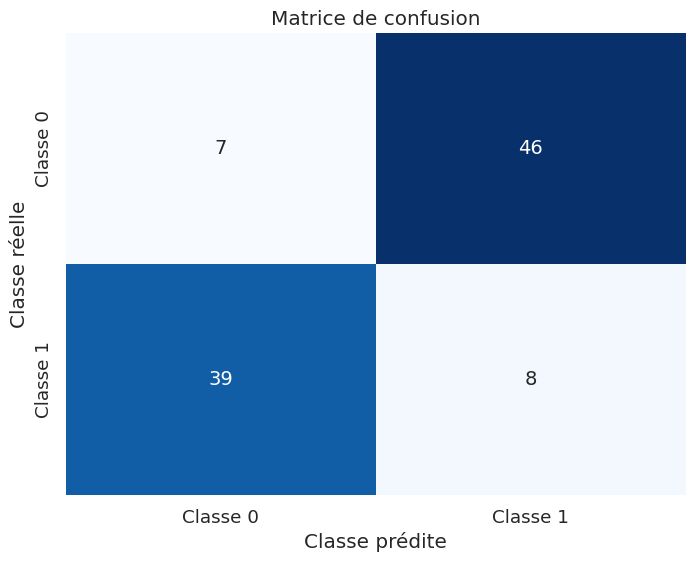

In [426]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_MALA)

# Étiquettes des classes
class_names = ['Classe 0', 'Classe 1']

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion')
plt.show()


/tmp/ipykernel_339306/2623174460.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/home/onyxia/work/Sampling-Methods-MCMC-Project/mMALA/mMALA_virtual_env/lib/python3.11/site-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


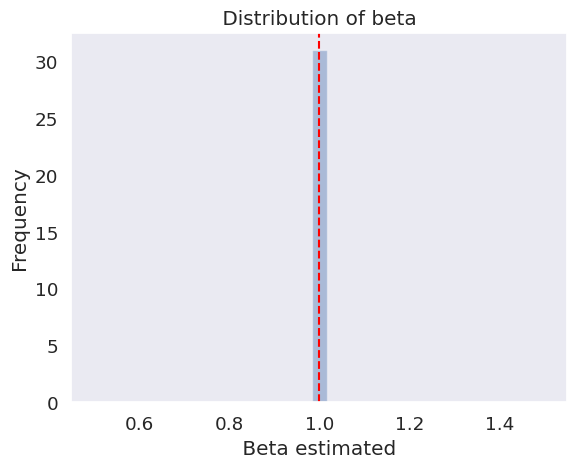

In [427]:
plot_chaine_distr(MALA_chaine)

 # ACCURACY

In [428]:
def get_accuracy(labels_true,labels_pred):
    total_samples=labels_true.shape[0]
    total_correct=0

    total_correct += (labels_true==labels_pred).sum()
    accuracy= total_correct / total_samples


    # Calculer l'exactitude à la fin de chaque époque
    return accuracy 

In [429]:
MALA_accuracy=get_accuracy(Y_test,y_pred)
mMALA_accuracy=get_accuracy(Y_test,y_pred_MALA)

print( "MALA Accuracy :",MALA_accuracy)
print( "mMALA Accuracy :",mMALA_accuracy)

MALA Accuracy : 0.53
mMALA Accuracy : 0.15


# TO DO


- find the best step-size
- compare the true posterior distribution of teta_i and the markov_chaine of teta_i
- appliquer le modele sur un de dataset fournis dans le papier et faire un etude sur les effets partiels
